# Chapter 4. Getting started with neural networks: Classification and regression

### Listing 4.1 Loading the IMDB dataset

In [3]:
from tensorflow.keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
train_data[0]

In [8]:
train_labels[0]

np.int64(1)

Because we’re restricting ourselves to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [9]:
max([max(sequence) for sequence in train_data])

9999

here’s how you can quickly decode one of these reviews back to English words

### Listing 4.2 Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decode_reviews = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

print(decode_reviews)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### 4.1.2 Preparing the data

Listing 4.3 Encoding the integer sequences via multi-hot encoding

In [16]:
import numpy as np

In [18]:
def vectorize_sequences(sequences, dimention = 10000):
  results = np.zeros((len(sequences), dimention))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
    return results

In [19]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Here’s what the samples look like now:

In [20]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your labels, which is straightforward:

In [21]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Now the data is ready to be fed into a neural network.

### 4.1.3 Building your model

There are two key architecture decisions to be made about such a stack of Dense layers:

- How many layers to use

- How many units to choose for each layer

In chapter 5, you’ll learn formal principles to guide you in making these choices. For the time being, you’ll have to trust me with the following architecture choices:

- Two intermediate layers with 16 units each

- A third layer that will output the scalar prediction regarding the sentiment of the current review

### Listing 4.4 Model definition

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
model = keras.Sequential([
                        layers.Dense(16, activation="relu"),
                        layers.Dense(16, activation="relu"),
                        layers.Dense(1, activation="sigmoid")
                        ])

Here’s the step where we configure the model with the rmsprop optimizer and
the binary_crossentropy loss function. Note that we’ll also monitor accuracy during
training.

### Listing 4.5 Compiling the model

In [39]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### 4.1.4 Validating your approach

Setting aside a validation set

In [40]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train the model for 20 epochs (20 iterations over all samples in the training
data) in mini-batches of 512 samples. At the same time, we will monitor loss and
accuracy on the 10,000 samples that we set apart. We do so by passing the validation
data as the validation_data argument.

### Listing 4.7 Training your model

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                     validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4966 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5040 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6933
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5085 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6933
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5036 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6933
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.4947 - v

In [46]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Listing 4.8 Plotting the training and validation loss

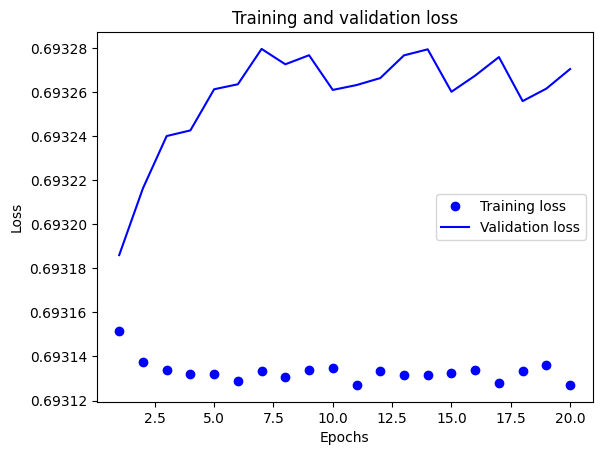

In [47]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Figure 4.4 Training and validation loss

### Listing 4.9 Plotting the training and validation accuracy

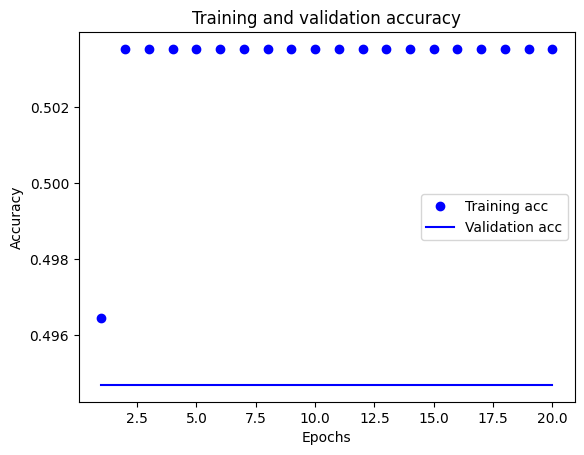

In [48]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
# Embed the image into the notebook
def embed_image(filename):
  from IPython.display import Image, display
  import base64

  with open(filename, "rb") as f:
    data = base64.b64encode(f.read()).decode()

  display(Image(data=base64.b64decode(data)))

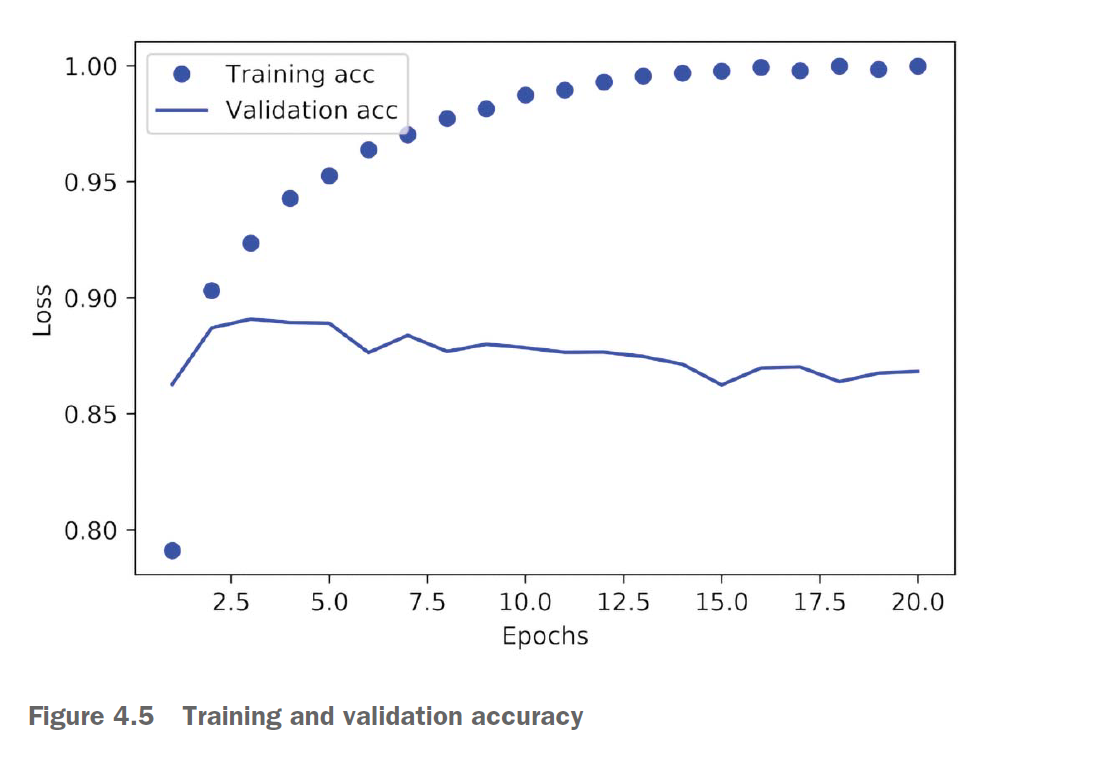

In [50]:
embed_image("C:/Users/mistr/Pictures/Screenshots/DL_04.png")

### Listing 4.10 Retraining a model from scratch

In [ ]:
s